In [152]:
import matplotlib.pyplot as plt
import pandas as pd

In [153]:
appleOldData = pd.read_csv("../Data/HistoricalStocks/AAPL_1980-2021.csv", usecols=['date', 'open', 'high', 'low', 'close', 'volume'])

In [154]:
appleOldData['date'] = pd.to_datetime(appleOldData['date'])
appleOldData.tail()

,date,open,high,low,close,volume
10463,2022-06-13,132.869995,135.199997,131.440002,131.880005,122207100
10464,2022-06-14,133.130005,133.889999,131.479996,132.759995,84784300
10465,2022-06-15,134.289993,137.339996,132.160004,135.429993,91533000
10466,2022-06-16,132.080002,132.389999,129.039993,130.059998,108123900
10467,2022-06-17,130.070007,133.080002,129.809998,131.559998,134118500


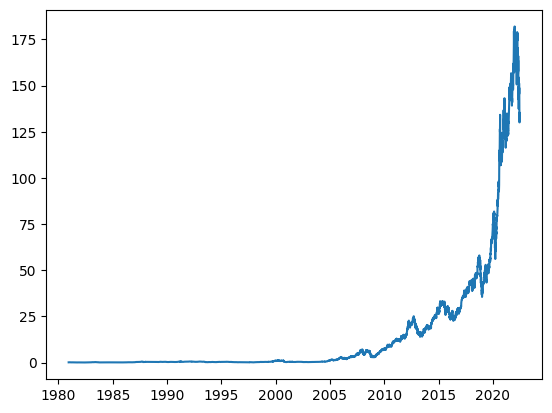

In [155]:
plt.plot(appleOldData['date'], appleOldData['close'])

In [156]:
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
import numpy as np

In [165]:
#raw data preprocessing step
appleOldData = appleOldData.select_dtypes(include=['float64', 'int64'])
appleOldData = appleOldData.fillna(0)
appleOldData = appleOldData.astype('float64')
#log scale volume
appleOldData['close'] = np.log1p(appleOldData['close'])
appleOldData['volume'] = np.log1p(appleOldData['volume'])
appleOldData.tail()

,open,high,low,close,volume
10463,132.869995,135.199997,131.440002,4.889447,18.621228
10464,133.130005,133.889999,131.479996,4.896047,18.255621
10465,134.289993,137.339996,132.160004,4.915812,18.332210
10466,132.080002,132.389999,129.039993,4.875655,18.498788
10467,130.070007,133.080002,129.809998,4.887035,18.714234


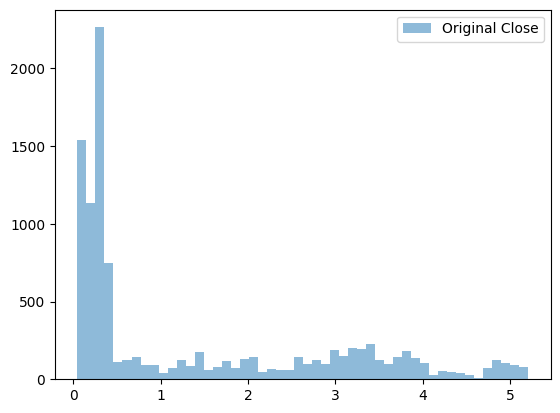

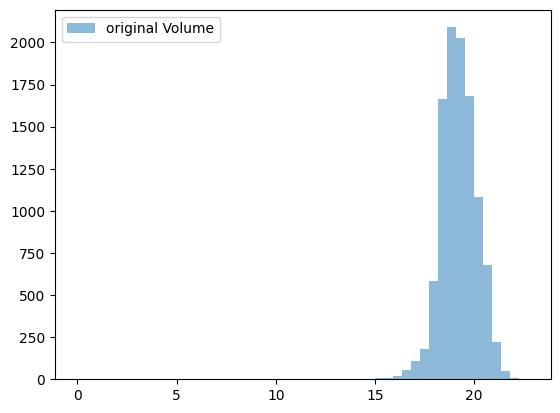

In [166]:
plt.hist(appleOldData.iloc[:, 3], bins=50, alpha=0.5, label="Original Close")
plt.legend()
plt.show()

plt.hist(appleOldData.iloc[:, 4], bins=50, alpha=0.5, label="original Volume")
plt.legend()
plt.show()

In [167]:
scaler = RobustScaler().fit(appleOldData)
appleScaled = scaler.transform(appleOldData)

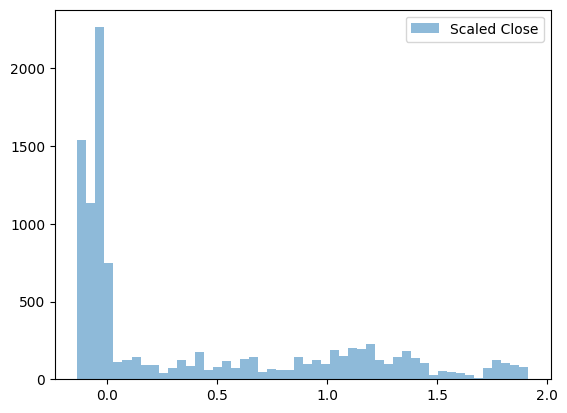

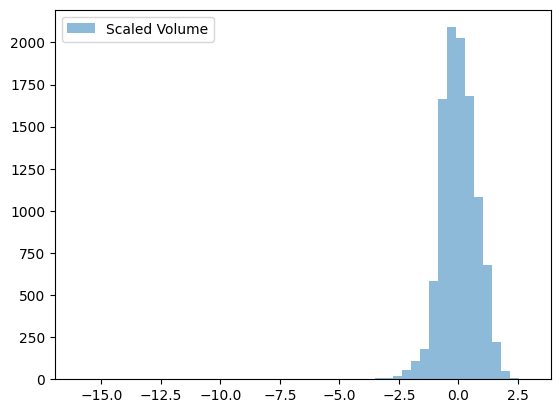

In [168]:
plt.hist(appleScaled[:, 3], bins=50, alpha=0.5, label="Scaled Close")
plt.legend()
plt.show()

plt.hist(appleScaled[:, 4], bins=50, alpha=0.5, label="Scaled Volume")
plt.legend()
plt.show()

In [169]:
appleScaled.mean(axis=0)

array([0.97369151, 0.97771285, 0.98007195, 0.40117277, 0.02654233])

In [170]:
appleScaled.std(axis=0)

array([2.17539459, 2.186344  , 2.18804678, 0.60658257, 0.75539771])

In [171]:
appleScaled

array([[-0.02356941, -0.0239616 , -0.02341958, -0.10656336,  0.63835887],
       [-0.02398782, -0.02441502, -0.02388407, -0.10892822, -0.17963284],
       [-0.02459648, -0.02501964, -0.02450346, -0.11210377, -0.60408784],
       ...,
       [ 9.12184843,  9.26723684,  9.1353941 ,  1.79860646, -0.72432091],
       [ 8.97119963,  8.93204962,  8.91896419,  1.78265154, -0.5854003 ],
       [ 8.83418399,  8.97877292,  8.97237814,  1.78717309, -0.40572566]])

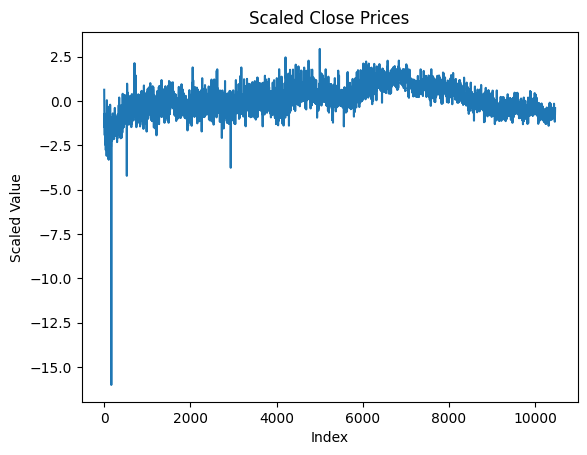

In [172]:
# Assuming the second column (index 1) corresponds to 'close'
plt.plot(appleScaled[:, 4])  # Replace 1 with the correct index for 'close'
plt.title('Scaled Close Prices')
plt.xlabel('Index')
plt.ylabel('Scaled Value')
plt.show()